# Testing LPIPS

Here, we test the LPIPS functionality that we have implemented to see does it really represent the semantic distance between two images or not.

In [1]:
!pip install lpips

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 16.4 MB/s eta 0:00:00


In [1]:
import torch
import sys

sys.path.append("..")
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
from lpips import LPIPS

lpips_kwargs = (
    {
        "pretrained": True,
        "net": "alex",
        "version": "0.1",
        "lpips": True,
        "spatial": False,
        "pnet_rand": False,
        "pnet_tune": False,
        "use_dropout": True,
        "model_path": None,
        "eval_mode": True,
        "verbose": False,
    }
)

perceptual_function = LPIPS(**lpips_kwargs)




ImportError: cannot import name 'AlexNet_Weights' from 'lpips' (/home/hamid/miniconda3/envs/ood-detection/lib/python3.10/site-packages/lpips/__init__.py)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Using downloaded and verified file: ../data/svhn/test_32x32.mat
Using downloaded and verified file: ../data/svhn/train_32x32.mat
Using downloaded and verified file: ../data/svhn/test_32x32.mat


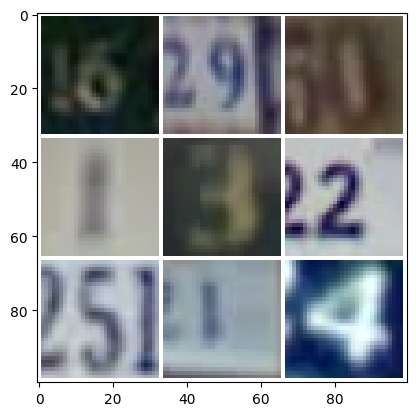

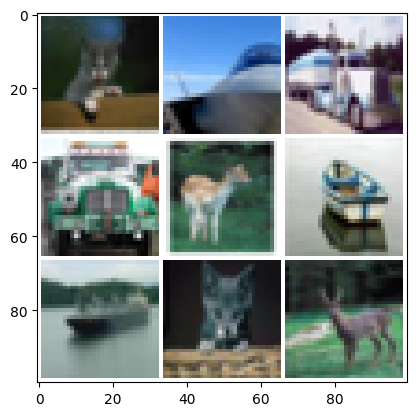

In [38]:
from model_zoo.datasets import get_loaders
from dotenv import load_dotenv
import os
import torchvision
import matplotlib.pyplot as plt


load_dotenv(override=True)
data_root = os.environ.get('DATA_DIR', '../data')

cifar10_loader, _, _ = get_loaders( 'cifar10', data_root=os.environ.get('DATA_DIR', '../data'), device=device, batch_size=9)
svhn_loader, _, _ = get_loaders( 'svhn', data_root=os.environ.get('DATA_DIR', '../data'), device=device, batch_size=9)

svhn_batch = next(iter(svhn_loader))[0]/255
cifar10_batch = next(iter(cifar10_loader))[0]/255

svhn_grid = torchvision.utils.make_grid(svhn_batch, nrow=3, padding=1, pad_value=1)
cifar10_grid = torchvision.utils.make_grid(cifar10_batch, nrow=3, padding=1, pad_value=1)


# plot the images
plt.imshow(svhn_grid.permute(1, 2, 0).cpu().numpy()) 
plt.show()
plt.imshow(cifar10_grid.permute(1, 2, 0).cpu().numpy())
plt.show()


In [37]:
perceptual_function = perceptual_function.to(device)
perceptual_function.forward(svhn_batch, cifar10_batch).flatten()
# reshuffle the svhn batch
for i in range(10):
    svhn_batch_reshuffled = svhn_batch[torch.randperm(svhn_batch.size(0))]
    cifar10_batch_reshuffled = cifar10_batch[torch.randperm(cifar10_batch.size(0))]
    print("SVHN and SVHN", perceptual_function.forward(svhn_batch_reshuffled, svhn_batch).flatten().mean().item())
    print("CIFAR10 and CIFAR10", perceptual_function.forward(cifar10_batch_reshuffled, cifar10_batch).flatten().mean().item())
    print("SVHN and CIFAR10", perceptual_function.forward(cifar10_batch_reshuffled, svhn_batch_reshuffled).flatten().mean().item())
    print("----")

SVHN and SVHN 0.13352897763252258
CIFAR10 and CIFAR10 0.07795926183462143
SVHN and CIFAR10 0.30489951372146606
----
SVHN and SVHN 0.08048579841852188
CIFAR10 and CIFAR10 0.07885492593050003
SVHN and CIFAR10 0.2913902997970581
----
SVHN and SVHN 0.12339054048061371
CIFAR10 and CIFAR10 0.10636205971240997
SVHN and CIFAR10 0.2878298759460449
----
SVHN and SVHN 0.13209982216358185
CIFAR10 and CIFAR10 0.09892133623361588
SVHN and CIFAR10 0.3000243902206421
----
SVHN and SVHN 0.1608019471168518
CIFAR10 and CIFAR10 0.0991378203034401
SVHN and CIFAR10 0.2985609471797943
----
SVHN and SVHN 0.08257419615983963
CIFAR10 and CIFAR10 0.08778340369462967
SVHN and CIFAR10 0.2950548529624939
----
SVHN and SVHN 0.1421164721250534
CIFAR10 and CIFAR10 0.06584527343511581
SVHN and CIFAR10 0.3002689778804779
----
SVHN and SVHN 0.1384548842906952
CIFAR10 and CIFAR10 0.09544084221124649
SVHN and CIFAR10 0.2961679995059967
----
SVHN and SVHN 0.1429271250963211
CIFAR10 and CIFAR10 0.07625133544206619
SVHN and C

# Test on grayscale images

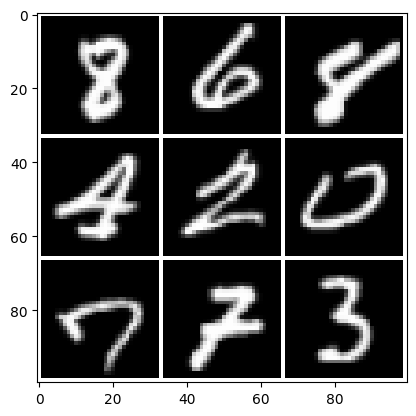

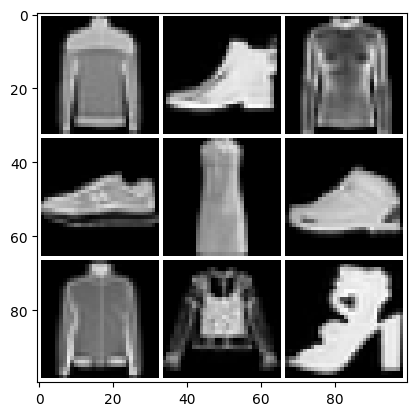

In [49]:
from model_zoo.datasets import get_loaders
from dotenv import load_dotenv
import os
import torchvision
import matplotlib.pyplot as plt


load_dotenv(override=True)
data_root = os.environ.get('DATA_DIR', '../data')
mnist_loader, _, _ = get_loaders( 'mnist', data_root=os.environ.get('DATA_DIR', '../data'), device=device, batch_size=9, additional_dataset_args=dict(resize_image=[32, 32]))
fmnist_loader, _, _ = get_loaders( 'fashion-mnist', data_root=os.environ.get('DATA_DIR', '../data'), device=device, batch_size=9, additional_dataset_args=dict(resize_image=[32, 32]))

mnist_batch = next(iter(mnist_loader))[0]/255
fmnist_batch = next(iter(fmnist_loader))[0]/255

mnist_grid = torchvision.utils.make_grid(mnist_batch, nrow=3, padding=1, pad_value=1)
fmnist_grid = torchvision.utils.make_grid(fmnist_batch, nrow=3, padding=1, pad_value=1)


# plot the images
plt.imshow(mnist_grid.permute(1, 2, 0).cpu().numpy()) 
plt.show()
plt.imshow(fmnist_grid.permute(1, 2, 0).cpu().numpy())
plt.show()


In [50]:
fmnist_batch.shape

torch.Size([9, 1, 32, 32])

In [51]:
perceptual_function = perceptual_function.to(device)
perceptual_function.forward(mnist_batch, fmnist_batch).flatten()
# repeat the first channel of fmnist and mnist batch
# fmnist_batch = fmnist_batch.repeat(1, 1, 1, 3)

# reshuffle the svhn batch
for i in range(10):
    mnist_batch_reshuffled = mnist_batch[torch.randperm(mnist_batch.size(0))]
    fmnist_batch_reshuffled = fmnist_batch[torch.randperm(fmnist_batch.size(0))]
    print("MNIST and MNIST", perceptual_function.forward(mnist_batch_reshuffled, mnist_batch).flatten().mean().item())
    print("FMNIST and FMNIST", perceptual_function.forward(fmnist_batch_reshuffled, fmnist_batch).flatten().mean().item())
    print("MNIST and FMNIST", perceptual_function.forward(fmnist_batch_reshuffled, mnist_batch_reshuffled).flatten().mean().item())
    print("----")

MNIST and MNIST 0.1282050758600235
FMNIST and FMNIST 0.13158398866653442
MNIST and FMNIST 0.2004987746477127
----
MNIST and MNIST 0.0783696323633194
FMNIST and FMNIST 0.14682313799858093
MNIST and FMNIST 0.17019023001194
----
MNIST and MNIST 0.10803841054439545
FMNIST and FMNIST 0.16622796654701233
MNIST and FMNIST 0.18545599281787872
----
MNIST and MNIST 0.06142694503068924
FMNIST and FMNIST 0.12464667856693268
MNIST and FMNIST 0.19805908203125
----
MNIST and MNIST 0.10920999199151993
FMNIST and FMNIST 0.16765549778938293
MNIST and FMNIST 0.18476170301437378
----
MNIST and MNIST 0.10500403493642807
FMNIST and FMNIST 0.13593663275241852
MNIST and FMNIST 0.17479340732097626
----
MNIST and MNIST 0.08774758875370026
FMNIST and FMNIST 0.15098606050014496
MNIST and FMNIST 0.17016346752643585
----
MNIST and MNIST 0.0678379163146019
FMNIST and FMNIST 0.15727336704730988
MNIST and FMNIST 0.17096558213233948
----
MNIST and MNIST 0.08867409825325012
FMNIST and FMNIST 0.16800068318843842
MNIST an